# Principal Agent model 

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# plotting
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# local modules
from modelproject import PrincipalAgentClass


# Model description

**Write out the model in equations here.** 
 

The principal owns a Joe and the Juice and employ an employee (Agent) to sell the juice. The agents utility function is given by $\frac{w^{1-\rho}}{1-\rho} - c \cdot e$, where w is the wage received, and $e=e^*$ when the employee stays home at night to be well-rested and $e=0$ when he goes partying. He has a reservation utility of $\bar{u}$.

The employee can sell lots of juice, $s_H$, and only a little juice, $s_L$. When the employee is hungover the probability of high juice sales is $\pi_0$. When the employee is not hungover, $e=e^*$ the probability is $\pi_1$.

The principal suggest a contract with a wage og $w_H$ if the employee sells a lot, and $w_L$ if the employee sells a little. 
The principal chooses $(w_L,w_H)$ so as to maximize expected profit:
$$\begin{align} profit = \pi_1 * (s_H-w_H) +(1-\pi_1)(s_L-w_L)
\end{align}$$

If the principal wants the agent to work hard the problem looks like the following:
$$ 
\begin{align*}
\min_{w_{h},w_{L}} \pi_1 \cdot w_H +(1-\pi_1)w_L \\
 \text{s.t.} \\
 \pi_1 (\frac{w_H^{1-\rho}}{1-\rho} -c \cdot e^*) + (1-\pi_1) (\frac{w_L^{1-\rho}}{1-\rho} -c \cdot e^*) \geq \bar{u} \\
 
 \pi_1 (\frac{w_H^{1-\rho}}{1-\rho} -c \cdot e^*) + (1-\pi_1) (\frac{w_L^{1-\rho}}{1-\rho} -c \cdot e^*) \geq \pi_0 (\frac{w_H^{1-\rho}}{1-\rho})+(1-\pi_0)(\frac{w_L^{1-\rho}}{1-\rho})
\end{align*}


$$

The IC-constraint can be rewritten:
$$
\begin{align*}
 \pi_1 (\frac{w_H^{1-\rho}}{1-\rho} -c \cdot e^*) + (1-\pi_1) (\frac{w_L^{1-\rho}}{1-\rho} -c \cdot e^*) \geq \pi_0 (\frac{w_H^{1-\rho}}{1-\rho})+(1-\pi_0)(\frac{w_L^{1-\rho}}{1-\rho}) \Longleftrightarrow \\
(\pi_1-\pi_0)\frac{w_H^{1-\rho}}{1-\rho} - (\pi_1-\pi_0)\frac{w_L^{1-\rho}}{1-\rho} \geq c\cdot e^* \Longleftrightarrow \\
\frac{w_H^{1-\rho}}{1-\rho} - \frac{w_L^{1-\rho}}{1-\rho} \geq \frac {c \cdot e^*}{\pi_1-\pi_0}
\end{align*}

If the principal wants the agent to just go partying the problem looks like the following:
$$ 
\begin{align*}
\min_{w_{h},w_{L}} \pi_1 \cdot w_H +(1-\pi_1)w_L \\
 \text{s.t.} \\
 \pi_0 (\frac{w_H^{1-\rho}}{1-\rho}) + (1-\pi_0) (\frac{w_L^{1-\rho}}{1-\rho}) \geq \bar{u} \\
 
 \pi_1 (\frac{w_H^{1-\rho}}{1-\rho} -c \cdot e^*) + (1-\pi_1) (\frac{w_L^{1-\rho}}{1-\rho} -c \cdot e^*) \leq \pi_0 (\frac{w_H^{1-\rho}}{1-\rho})+(1-\pi_0)(\frac{w_L^{1-\rho}}{1-\rho})
\end{align*}


$$

The IC-constraint can again be rewritten: 
$$
\begin{align*}
\frac{w_H^{1-\rho}}{1-\rho} - \frac{w_L^{1-\rho}}{1-\rho} \leq \frac {c \cdot e^*}{\pi_1-\pi_0}
\end{align*}

## Analytical solution

**Defining functions**

In [2]:
pi_1 = sm.symbols('pi_1')
pi_0 = sm.symbols('pi_0')
wH = sm.symbols('w_H')
wL = sm.symbols('w_L')
w = sm.symbols('w')
rho = sm.symbols('rho')
c = sm.symbols('c')
estar = sm.symbols('e^*')
ubar = sm.symbols('ubar')

In [3]:
# defining objective function
objective = pi_1*wH +(1-pi_1)*wL
objective

pi_1*w_H + w_L*(1 - pi_1)

In [4]:
# defining utility if high wage
uH = wH**(1-rho)/(1-rho)
uH

w_H**(1 - rho)/(1 - rho)

In [5]:
# defining utility if low wage
uL = wL**(1-rho)/(1-rho)
uL

w_L**(1 - rho)/(1 - rho)

### Solution if the principal wants high effort

In [6]:
# defining participation constraint. Will bind in optimum. 
IRconstraint_high_effort = sm.Eq(pi_1*(uH-c*estar) + (1-pi_1)*(uL-c*estar),ubar)
IRconstraint_high_effort 

Eq(pi_1*(-c*e^* + w_H**(1 - rho)/(1 - rho)) + (1 - pi_1)*(-c*e^* + w_L**(1 - rho)/(1 - rho)), ubar)

In [7]:
# defining participation constraint. Will bind in optimum. 
ICconstraint_high_effort = sm.Eq(uH-uL,c*estar/(pi_1-pi_0))
ICconstraint_high_effort

Eq(w_H**(1 - rho)/(1 - rho) - w_L**(1 - rho)/(1 - rho), c*e^*/(-pi_0 + pi_1))

**Solving for the optimal utilities**

In [8]:
# isolating uL from IR 
uL_from_IR_high_effort = sm.solve(IRconstraint_high_effort,uL)
uL_from_IR_high_effort[0]

(-c*e^**rho + c*e^* - pi_1*w_H**(1 - rho) - rho*ubar + ubar)/(pi_1*rho - pi_1 - rho + 1)

In [9]:
# substitutig uL into IC
IC_subs_high_effort = ICconstraint_high_effort.subs(uL, uL_from_IR_high_effort[0])
IC_subs_high_effort

Eq(w_H**(1 - rho)/(1 - rho) - (-c*e^**rho + c*e^* - pi_1*w_H**(1 - rho) - rho*ubar + ubar)/(pi_1*rho - pi_1 - rho + 1), c*e^*/(-pi_0 + pi_1))

In [10]:
# isolating uH
uH_from_IC_high_effort = sm.solve(IC_subs_high_effort, uH)
uH_from_IC_high_effort[0]

(-c*e^**pi_0*rho + c*e^**pi_0 + c*e^**rho - c*e^* - pi_0*pi_1*w_H**(1 - rho) - pi_0*rho*ubar + pi_0*ubar + pi_1**2*w_H**(1 - rho) + pi_1*rho*ubar - pi_1*ubar)/(pi_0*pi_1*rho - pi_0*pi_1 - pi_0*rho + pi_0 - pi_1**2*rho + pi_1**2 + pi_1*rho - pi_1)

In [11]:
# substituting uH into IC 
IC_subs1_high_effort = ICconstraint_high_effort.subs(uH, uH_from_IC_high_effort[0])
IC_subs1_high_effort

Eq(-w_L**(1 - rho)/(1 - rho) + (-c*e^**pi_0*rho + c*e^**pi_0 + c*e^**rho - c*e^* - pi_0*pi_1*w_H**(1 - rho) - pi_0*rho*ubar + pi_0*ubar + pi_1**2*w_H**(1 - rho) + pi_1*rho*ubar - pi_1*ubar)/(pi_0*pi_1*rho - pi_0*pi_1 - pi_0*rho + pi_0 - pi_1**2*rho + pi_1**2 + pi_1*rho - pi_1), c*e^*/(-pi_0 + pi_1))

In [12]:
# isolating uL
uL_from_IC_subs1_high_effort = sm.solve(IC_subs1_high_effort,uL)
uL_from_IC_subs1_high_effort[0]

(-c*e^**rho + c*e^* - pi_1*w_H**(1 - rho) - rho*ubar + ubar)/(pi_1*rho - pi_1 - rho + 1)

**Solving for the optimal wages**

In [13]:
# can now solve for the high wage 
wH_solve_high_effort = sm.solve(sm.Eq(uH_from_IC_high_effort[0],uH),wH)
wH_solve_high_effort[0]

((-c*e^**pi_0*rho + c*e^**pi_0 + c*e^**rho - c*e^* - pi_0*rho*ubar + pi_0*ubar + pi_1*rho*ubar - pi_1*ubar)/(pi_0 - pi_1))**(-1/(rho - 1))

In [14]:
# solving for wL
wL_solve_high_effort = sm.solve(sm.Eq(uL_from_IC_subs1_high_effort[0],uL),wL)
wL_solve_high_effort[0]

((c*e^**rho**2 - 2*c*e^**rho + c*e^* + pi_1*rho*w_H**(1 - rho) - pi_1*w_H**(1 - rho) + rho**2*ubar - 2*rho*ubar + ubar)/(pi_1*rho - pi_1 - rho + 1))**(-1/(rho - 1))

In [15]:
# defining wL without wH (only with parameters from the model)
wL_without_wages_high_effort = wL_solve_high_effort[0].subs(wH,wH_solve_high_effort[0])
wL_without_wages_high_effort

((c*e^**rho**2 - 2*c*e^**rho + c*e^* + pi_1*rho*(((-c*e^**pi_0*rho + c*e^**pi_0 + c*e^**rho - c*e^* - pi_0*rho*ubar + pi_0*ubar + pi_1*rho*ubar - pi_1*ubar)/(pi_0 - pi_1))**(-1/(rho - 1)))**(1 - rho) - pi_1*(((-c*e^**pi_0*rho + c*e^**pi_0 + c*e^**rho - c*e^* - pi_0*rho*ubar + pi_0*ubar + pi_1*rho*ubar - pi_1*ubar)/(pi_0 - pi_1))**(-1/(rho - 1)))**(1 - rho) + rho**2*ubar - 2*rho*ubar + ubar)/(pi_1*rho - pi_1 - rho + 1))**(-1/(rho - 1))

**Making the solutions into lambda functions**

In [16]:
# low wage
wL_func_high_effort = sm.lambdify(args=(pi_1,pi_0,rho,c,estar,ubar), expr=wL_without_wages_high_effort)

In [17]:
# high wage 
wH_func_high_effort = sm.lambdify(args=(pi_1,pi_0,rho,c,estar,ubar), expr=wH_solve_high_effort)

### Solution if the principal wants low effort

If the principal wants low effort only the IR will bind, since you would not want to differentiate the wages, if you only want the agent to provide low effort (because the agent is risk-averse this is optimal).

Therefore $w_L=w_H=w$

In [18]:
IRconstraint_low_effort = sm.Eq(pi_1*w**(1-rho)/(1-rho) + (1-pi_1)*w**(1-rho)/(1-rho),ubar)
IRconstraint_low_effort 

Eq(pi_1*w**(1 - rho)/(1 - rho) + w**(1 - rho)*(1 - pi_1)/(1 - rho), ubar)

In [19]:
w_solve_low_effort = sm.solve(IRconstraint_low_effort ,w)
w_solve_low_effort[0]

(ubar*(1 - rho))**(-1/(rho - 1))

**Making the solutions into lambda functions**

In [20]:
w_func_low_effort = sm.lambdify(args=(rho,ubar),expr=w_solve_low_effort)

## Numerical solution

In [21]:
model = PrincipalAgentClass()
par = model.par
sol = model.sol

initializing the model:


In [22]:
model.solve()

In [23]:
print(sol)

namespace(wH_high_effort=11.390624999999956, wL_high_effort=4.515624999999696, profit_high_effort=60.67187500000012, wH_loweffort=6.250000153314146, wL_loweffort=6.2499999342922266, profit_low_effort=23.750000000001197, wH=11.390624999999956, wL=4.515624999999696, high_effort=True, profit=60.67187500000012)


In [24]:
print(f'The high sales wage when wanting high effort is {sol.wH_high_effort}')
print(f'The low sales wage when wanting high effort is {sol.wL_high_effort}')
print(f'The resulting profit when wanting high effort is {sol.profit_high_effort}')


The high sales wage when wanting high effort is 11.390624999999956
The low sales wage when wanting high effort is 4.515624999999696
The resulting profit when wanting high effort is 60.67187500000012


In [25]:
print(f'The high sales wage when wanting low effort is {sol.wH_loweffort}')
print(f'The low sales wage when wanting low effort is {sol.wL_loweffort}')
print(f'The resulting profit when wanting low effort is {sol.profit_low_effort}')

The high sales wage when wanting low effort is 6.250000153314146
The low sales wage when wanting low effort is 6.2499999342922266
The resulting profit when wanting low effort is 23.750000000001197


**Checking differences between numerical and analytical solutions**

In [26]:
steps = 20
grid = np.linspace(1,10,steps)

wH_analytical_u_high_effort = np.nan + np.zeros(steps)
wH_numerical_u_high_effort = np.nan + np.zeros(steps)
wL_analytical_u_high_effort = np.nan + np.zeros(steps)
wL_numerical_u_high_effort = np.nan + np.zeros(steps)
IR_numerical_u_high_effort = np.nan + np.zeros(steps)
IR_numerical_u_high_effort = np.nan + np.zeros(steps)
IC_numerical_u_high_effort = np.nan + np.zeros(steps)
IR_analytical_u_high_effort = np.nan + np.zeros(steps)
IC_analytical_u_high_effort = np.nan + np.zeros(steps)

In [27]:
for i,u in enumerate(grid):
    par.ubar = u
    model.solve()
    wH_numerical_u_high_effort[i] = sol.wH_high_effort
    wL_numerical_u_high_effort[i] = sol.wL_high_effort
    wH_analytical_u_high_effort[i] = wH_func_high_effort(par.pi_1,par.pi_0,par.rho,par.c,par.e,par.ubar)[0]
    wL_analytical_u_high_effort[i] = wL_func_high_effort(par.pi_1,par.pi_0,par.rho,par.c,par.e,par.ubar)
    IR_numerical_u_high_effort[i] = model.calc_utility(sol.wH_high_effort,sol.wL_high_effort,1) - par.ubar
    IR_analytical_u_high_effort[i] = model.calc_utility(wH_analytical_u_high_effort[i],wL_analytical_u_high_effort[i],1) - par.ubar
    IC_numerical_u_high_effort[i] = model.calc_utility(sol.wH_high_effort,sol.wL_high_effort,1) - model.calc_utility(sol.wH_high_effort,sol.wL_high_effort,0)
    IC_analytical_u_high_effort[i] = model.calc_utility(wH_analytical_u_high_effort[i],wL_analytical_u_high_effort[i],1) - model.calc_utility(wH_analytical_u_high_effort[i],wL_analytical_u_high_effort[i],0)

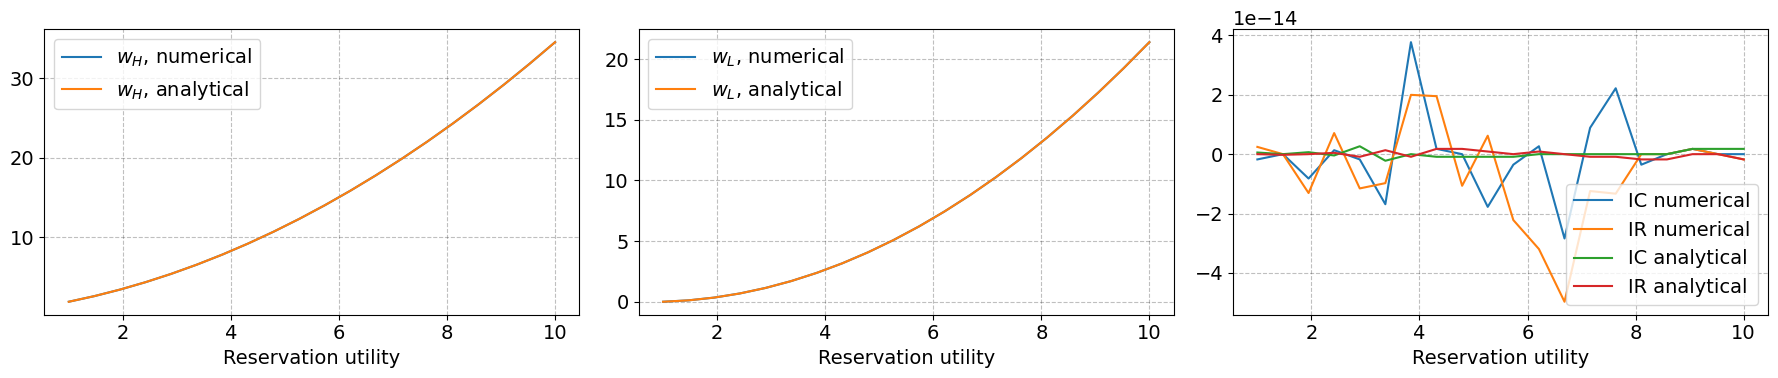

In [28]:
fig = plt.figure(figsize=(3*6, 6/1.5))

ax = fig.add_subplot(1,3,1)
ax.plot(grid,wH_numerical_u_high_effort,label=r'$w_H$, numerical')
ax.plot(grid,wH_analytical_u_high_effort, label=r'$w_H$, analytical')
ax.set(xlabel ='Reservation utility')
ax.legend(frameon=True)

ax = fig.add_subplot(1,3,2)
ax.plot(grid,wL_numerical_u_high_effort,label=r'$w_L$, numerical')
ax.plot(grid,wL_analytical_u_high_effort, label=r'$w_L$, analytical')
ax.set(xlabel ='Reservation utility')
ax.legend(frameon=True)

ax = fig.add_subplot(1,3,3)
ax.plot(grid,IC_numerical_u_high_effort,label=r'IC numerical')
ax.plot(grid,IR_numerical_u_high_effort, label=r'IR numerical')
ax.plot(grid,IC_analytical_u_high_effort,label=r'IC analytical')
ax.plot(grid,IR_analytical_u_high_effort, label=r'IR analytical')
ax.set(xlabel ='Reservation utility')
ax.legend(frameon=True)


fig.tight_layout()


# Further analysis

We now try to see how our model changes with parameter values.

**Probability of high sales if hard work, $\pi_1$**

In [29]:
model = PrincipalAgentClass()
par = model.par
sol = model.sol

initializing the model:


In [30]:
steps = 20
grid = np.linspace(par.pi_0,1,steps)

wH = np.nan + np.zeros(steps)
wL = np.nan + np.zeros(steps)
profit_low_effort = np.nan + np.zeros(steps)
profit_high_effort = np.nan + np.zeros(steps)

In [31]:
for i,pi_1 in enumerate(grid):
    par.pi_1 = pi_1
    model.solve()
    wH[i] = sol.wH
    wL[i] = sol.wL 
    profit_low_effort[i] = sol.profit_low_effort
    profit_high_effort[i] = sol.profit_high_effort

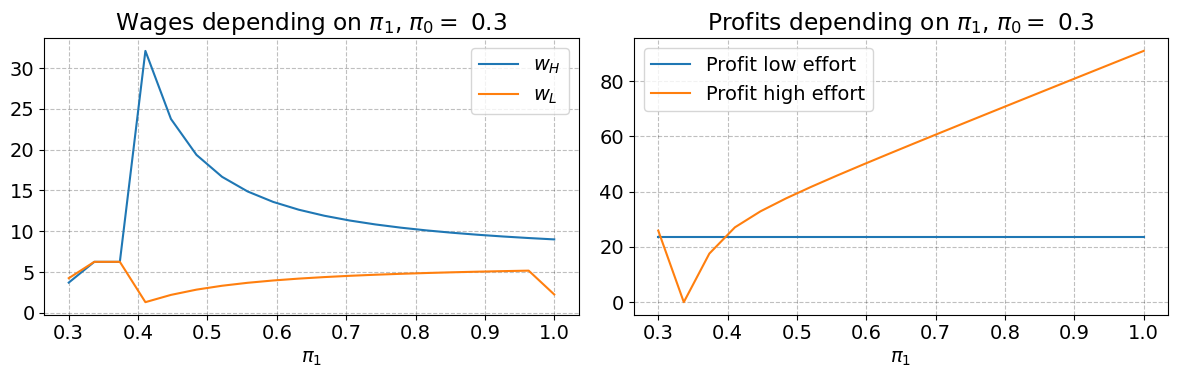

In [32]:
fig = plt.figure(figsize=(2*6,6/1.5))

ax = fig.add_subplot(1,2,1)
ax.set_title(f'Wages depending on $\pi_1$, $\pi_0=$ {par.pi_0}')
ax.plot(grid,wH,label=r'$w_H$')
ax.plot(grid,wL, label=r'$w_L$')
ax.set(xlabel =r'$\pi_1$')
ax.legend(frameon=True)

ax = fig.add_subplot(1,2,2)
ax.set_title(f'Profits depending on $\pi_1$, $\pi_0=$ {par.pi_0}')
ax.plot(grid,profit_low_effort,label='Profit low effort')
ax.plot(grid,profit_high_effort, label='Profit high effort')
ax.set(xlabel =r'$\pi_1$')
ax.legend(frameon=True)
fig.tight_layout()


**Cost of effort, C**

In [56]:
model = PrincipalAgentClass()
par = model.par
sol = model.sol

initializing the model:


In [60]:
steps = 20
c_grid = np.linspace(0,3,steps)

wH = np.nan + np.zeros(steps)
wL = np.nan + np.zeros(steps)
profit_low_effort = np.nan + np.zeros(steps)
profit_high_effort = np.nan + np.zeros(steps)

In [61]:
for i,c in enumerate(grid):
    par.c = c
    model.solve()
    wH[i] = sol.wH
    wL[i] = sol.wL 
    profit_low_effort[i] = sol.profit_low_effort
    profit_high_effort[i] = sol.profit_high_effort

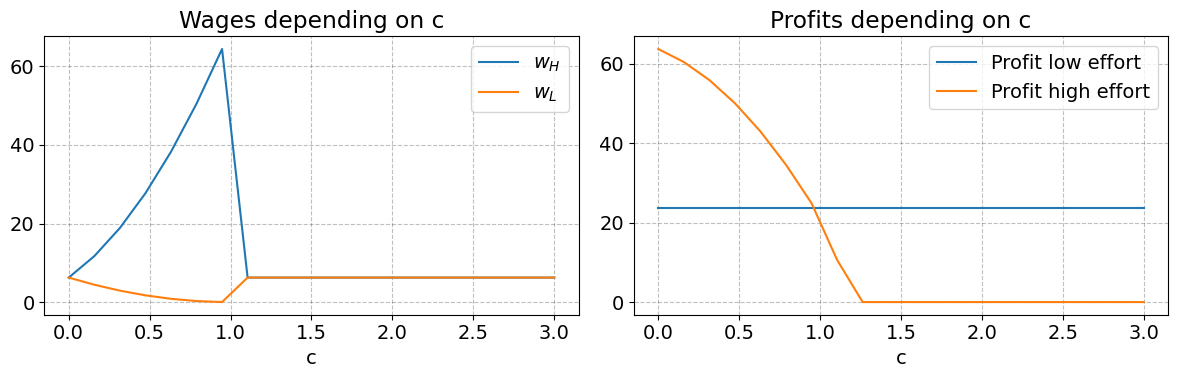

In [62]:
fig = plt.figure(figsize=(2*6,6/1.5))

ax = fig.add_subplot(1,2,1)
ax.set_title(f'Wages depending on c')
ax.plot(c_grid,wH,label=r'$w_H$')
ax.plot(c_grid,wL, label=r'$w_L$')
ax.set(xlabel ='c')
ax.legend(frameon=True)

ax = fig.add_subplot(1,2,2)
ax.set_title(f'Profits depending on c')
ax.plot(c_grid,profit_low_effort,label='Profit low effort')
ax.plot(c_grid,profit_high_effort, label='Profit high effort')
ax.set(xlabel ='c')
ax.legend(frameon=True)
fig.tight_layout()


**Reservation utility, $\bar{u}$**

In [37]:
model = PrincipalAgentClass()
par = model.par
sol = model.sol

initializing the model:


In [38]:
steps = 20
grid = np.linspace(0,20,steps)

wH = np.nan + np.zeros(steps)
wL = np.nan + np.zeros(steps)
profit_low_effort = np.nan + np.zeros(steps)
profit_high_effort = np.nan + np.zeros(steps)

In [39]:
for i,u in enumerate(grid):
    par.ubar = u
    model.solve()
    wH[i] = sol.wH
    wL[i] = sol.wL 
    profit_low_effort[i] = sol.profit_low_effort
    profit_high_effort[i] = sol.profit_high_effort

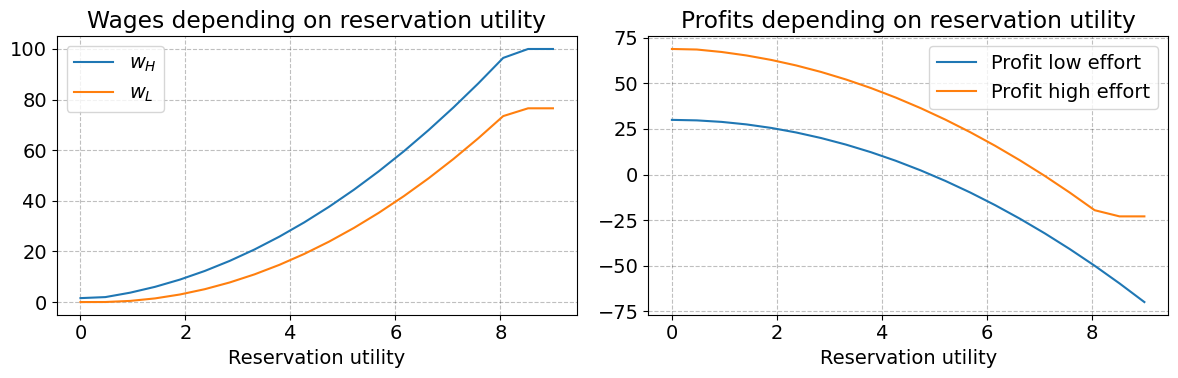

In [40]:
fig = plt.figure(figsize=(2*6,6/1.5))

ax = fig.add_subplot(1,2,1)
ax.set_title(f'Wages depending on reservation utility')
ax.plot(c_grid,wH,label=r'$w_H$')
ax.plot(c_grid,wL, label=r'$w_L$')
ax.set(xlabel =f'Reservation utility')
ax.legend(frameon=True)

ax = fig.add_subplot(1,2,2)
ax.set_title(f'Profits depending on reservation utility')
ax.plot(c_grid,profit_low_effort,label='Profit low effort')
ax.plot(c_grid,profit_high_effort, label='Profit high effort')
ax.set(xlabel =f'Reservation utility')
ax.legend(frameon=True)
fig.tight_layout()


Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 